In [4]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'returns.xlsx'
df = pd.read_excel(file_path)

print("First 5 rows of the dataset:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nMissing Values:")
print(df.isnull().sum())

First 5 rows of the dataset:
                   Barkod  Sipariş Numarası   İade Kargo Kodu  \
0          19092021104G3M        1974557710  7330008079118357   
1             ddm23011505        1965778635  7280008082967900   
2              ddm1040905        1985963934  7280008086588613   
3  7metretelliyaprakrdt00        1980027276  7330008094503879   
4          MDL8MDL11RDT05        1980027276  7330008094503879   

     Sipariş Tarihi İade Talep Tarihi                 Kargo Firması  \
0  23.04.2023 13:32  01.05.2023 11:42  Trendyol Express Marketplace   
1  17.04.2023 13:11  01.05.2023 15:42         MNG Kargo Marketplace   
2  28.04.2023 14:20  01.05.2023 19:51         MNG Kargo Marketplace   
3  25.04.2023 23:03  02.05.2023 10:36  Trendyol Express Marketplace   
4  25.04.2023 23:03  02.05.2023 10:36  Trendyol Express Marketplace   

                 İade Sebebi      Durum  \
0      Kalitesini beğenmedim  Onaylandı   
1  Teslim edilemeyen gönderi  Onaylandı   
2                      D

In [5]:
required_columns = ['İade Sebebi', 'Ürün Adı']
for col in required_columns:
    if col not in df.columns:
        raise ValueError(f"Column '{col}' is missing in the dataset.")

df_clean = df.dropna(subset=required_columns)

print(f"Shape of the dataset before cleaning: {df.shape}")
print(f"Shape of the dataset after cleaning: {df_clean.shape}")
print("\nSample data after cleaning:")
print(df_clean.head())

Shape of the dataset before cleaning: (183, 15)
Shape of the dataset after cleaning: (183, 15)

Sample data after cleaning:
                   Barkod  Sipariş Numarası   İade Kargo Kodu  \
0          19092021104G3M        1974557710  7330008079118357   
1             ddm23011505        1965778635  7280008082967900   
2              ddm1040905        1985963934  7280008086588613   
3  7metretelliyaprakrdt00        1980027276  7330008094503879   
4          MDL8MDL11RDT05        1980027276  7330008094503879   

     Sipariş Tarihi İade Talep Tarihi                 Kargo Firması  \
0  23.04.2023 13:32  01.05.2023 11:42  Trendyol Express Marketplace   
1  17.04.2023 13:11  01.05.2023 15:42         MNG Kargo Marketplace   
2  28.04.2023 14:20  01.05.2023 19:51         MNG Kargo Marketplace   
3  25.04.2023 23:03  02.05.2023 10:36  Trendyol Express Marketplace   
4  25.04.2023 23:03  02.05.2023 10:36  Trendyol Express Marketplace   

                 İade Sebebi      Durum  \
0      Kalitesi

In [ ]:
#Clustering by hand

In [6]:
cluster_mapping = {
    "Teslim edilemeyen gönderi": 3,
    "Bedeni/Ebatı Küçük Geldi": 1,
    "Kalitesini beğenmedim": 2,
    "Modelini beğenmedim": 1,
    "Vazgeçtim": 1,
    "Yanlış sipariş verdim": 1,
    "Kusurlu ürün gönderildi": 2,
    "Tazmin": 2,
    "Bedeni/Ebatı Büyük Geldi": 1,
    "Ürün ile Görsel & içerik bilgisi uyuşmuyor": 2,
    "Diğer": 3,
    "Eksik Ürün": 2,
    "Kargo Teslimatı Gecikmesi": 3,
    "Daha iyi bir fiyat mevcut": 1,
    "Yanlış ürün gönderildi": 2
}
df_clean['Cluster'] = df_clean['İade Sebebi'].map(cluster_mapping)

print("\nCluster Value Counts:")
print(df_clean['Cluster'].value_counts())


Cluster Value Counts:
Cluster
1    84
3    59
2    40
Name: count, dtype: int64


C:\Users\berka\AppData\Local\Temp\ipykernel_5220\2904934504.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster', data=df_clean, palette='viridis')


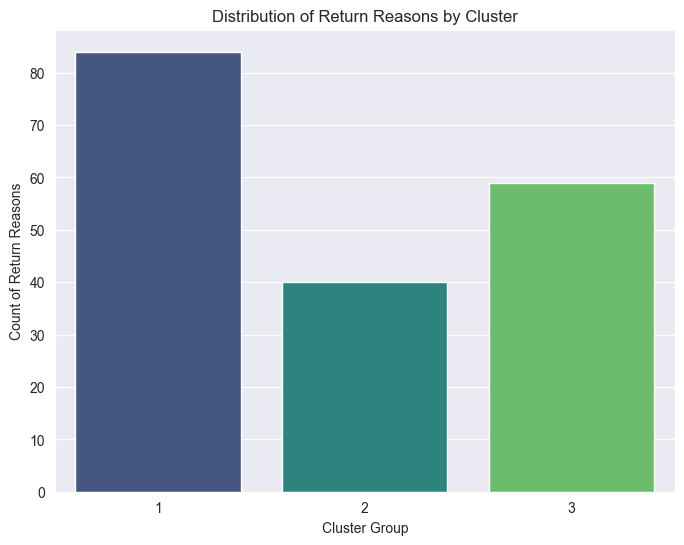

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.countplot(x='Cluster', data=df_clean, palette='viridis')

plt.title('Distribution of Return Reasons by Cluster')
plt.xlabel('Cluster Group')
plt.ylabel('Count of Return Reasons')

plt.show()

In [ ]:
#Clustering by AI

In [11]:
translation_dict = {
    "Teslim edilemeyen gönderi": "Undelivered package",
    "Bedeni/Ebatı Küçük Geldi": "Size too small",
    "Kalitesini beğenmedim": "Didn't like the quality",
    "Modelini beğenmedim": "Didn't like the model",
    "Vazgeçtim": "Changed my mind",
    "Yanlış sipariş verdim": "Ordered wrong item",
    "Kusurlu ürün gönderildi": "Defective product sent",
    "Tazmin": "Compensation",
    "Bedeni/Ebatı Büyük Geldi": "Size too big",
    "Ürün ile Görsel & içerik bilgisi uyuşmuyor": "Mismatch with product description",
    "Diğer": "Other",
    "Eksik Ürün": "Missing product",
    "Kargo Teslimatı Gecikmesi": "Delivery delay",
    "Daha iyi bir fiyat mevcut": "Found a better price",
    "Yanlış ürün gönderildi": "Wrong product sent"
}

df_clean['Return Reason English'] = df_clean['İade Sebebi'].map(translation_dict)

print("\nTranslated Return Reasons:")
print(df_clean[['İade Sebebi', 'Return Reason English']].drop_duplicates())


Translated Return Reasons:
                                    İade Sebebi  \
0                         Kalitesini beğenmedim   
1                     Teslim edilemeyen gönderi   
2                                         Diğer   
3                      Bedeni/Ebatı Küçük Geldi   
5                           Modelini beğenmedim   
9                                    Eksik Ürün   
12                                    Vazgeçtim   
16                      Kusurlu ürün gönderildi   
24   Ürün ile Görsel & içerik bilgisi uyuşmuyor   
28                        Yanlış sipariş verdim   
71                                       Tazmin   
72                     Bedeni/Ebatı Büyük Geldi   
120                   Kargo Teslimatı Gecikmesi   
148                   Daha iyi bir fiyat mevcut   
163                      Yanlış ürün gönderildi   

                 Return Reason English  
0              Didn't like the quality  
1                  Undelivered package  
2                               

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=100, stop_words='english') 
X_tfidf = tfidf.fit_transform(df_clean['Return Reason English'])

print("\nTF-IDF Matrix Shape:", X_tfidf.shape)
print("Top 10 terms from TF-IDF:")
print(tfidf.get_feature_names_out()[:10])


TF-IDF Matrix Shape: (183, 25)
Top 10 terms from TF-IDF:
['better' 'big' 'changed' 'compensation' 'defective' 'delay' 'delivery'
 'description' 'didn' 'item']


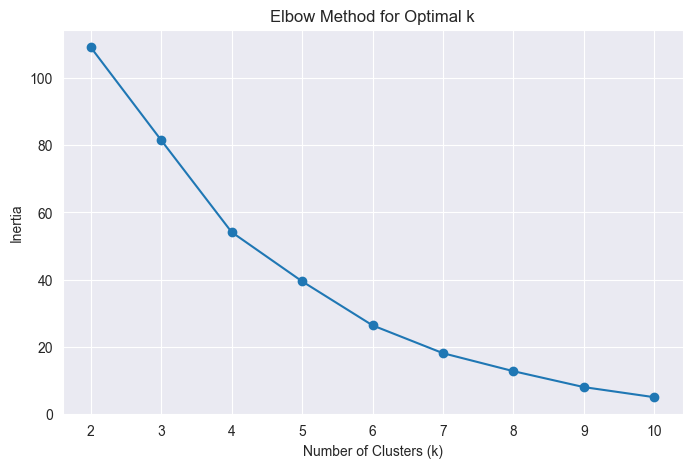

In [13]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_tfidf)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.show()

In [23]:
optimal_k = 3

kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_clean['Cluster_KMeans'] = kmeans.fit_predict(X_tfidf)

print("\nReturn Reason and Assigned Cluster:")
print(df_clean[['Return Reason English', 'Cluster_KMeans']].drop_duplicates())

print("\nCluster Value Counts:")
cluster_counts = df_clean['Cluster_KMeans'].value_counts().sort_index()
for cluster, count in cluster_counts.items():
    print(f"Cluster {cluster}: {count} entries")


Return Reason and Assigned Cluster:
                 Return Reason English  Cluster_KMeans
0              Didn't like the quality               1
1                  Undelivered package               0
2                                Other               0
3                       Size too small               2
5                Didn't like the model               1
9                      Missing product               0
12                     Changed my mind               0
16              Defective product sent               0
24   Mismatch with product description               0
28                  Ordered wrong item               0
71                        Compensation               0
72                        Size too big               2
120                     Delivery delay               0
148               Found a better price               0
163                 Wrong product sent               0

Cluster Value Counts:
Cluster 0: 102 entries
Cluster 1: 50 entries
Cluster 2: 31 e

C:\Users\berka\AppData\Local\Temp\ipykernel_5220\1322062677.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster_KMeans', data=df_clean, palette='viridis')


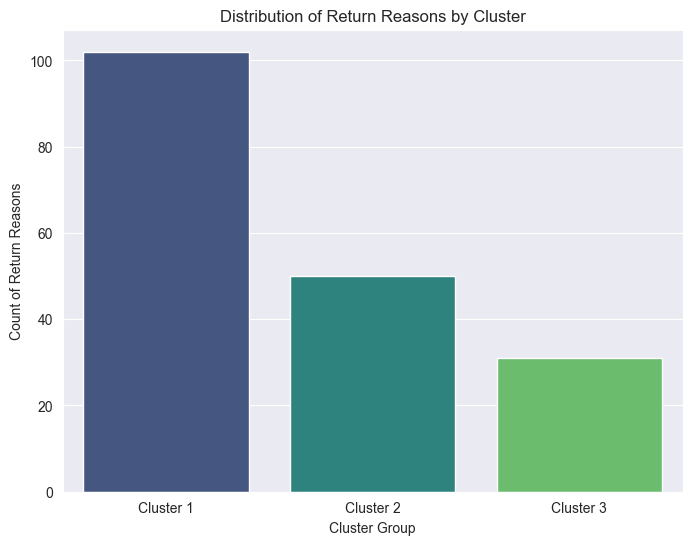

In [19]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x='Cluster_KMeans', data=df_clean, palette='viridis')

plt.title("Distribution of Return Reasons by Cluster")
plt.xlabel("Cluster Group")
plt.ylabel("Count of Return Reasons")
plt.xticks(ticks=[0, 1, 2], labels=[f"Cluster {i+1}" for i in range(optimal_k)])
plt.show()


In [20]:
ai_clusters = {1: 102, 2: 50, 3: 31}
manual_clusters = {1: 84, 2: 40, 3: 59}

total_ai = 0
total_manual = 0
total_abs_error = 0

print("Cluster Deviations:")
for cluster in sorted(ai_clusters.keys()):
    ai_count = ai_clusters[cluster]
    manual_count = manual_clusters[cluster]
    difference = ai_count - manual_count
    percentage_diff = (difference / manual_count) * 100  
    
    print(f"Cluster {cluster}: AI = {ai_count}, Manual = {manual_count}, "
          f"Difference = {difference}, Deviation = {percentage_diff:.2f}%")
    
    total_ai += ai_count
    total_manual += manual_count
    total_abs_error += abs(difference)

overall_error_percentage = (total_abs_error / total_manual) * 100

print("\nOverall Error Percentage:")
print(f"Total AI Count = {total_ai}, Total Manual Count = {total_manual}")
print(f"Overall Absolute Error = {total_abs_error}, Error Percentage = {overall_error_percentage:.2f}%")

Cluster Deviations:
Cluster 1: AI = 102, Manual = 84, Difference = 18, Deviation = 21.43%
Cluster 2: AI = 50, Manual = 40, Difference = 10, Deviation = 25.00%
Cluster 3: AI = 31, Manual = 59, Difference = -28, Deviation = -47.46%

Overall Error Percentage:
Total AI Count = 183, Total Manual Count = 183
Overall Absolute Error = 56, Error Percentage = 30.60%


In [33]:
from sklearn.cluster import SpectralClustering
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')
X_tfidf = tfidf.fit_transform(df_clean['Return Reason English'])

spectral = SpectralClustering(n_clusters=4, affinity='cosine', random_state=42)
df_clean['Cluster_Spectral'] = spectral.fit_predict(X_tfidf)

print("\nSpectral Clustering Results:")
print(df_clean[['Return Reason English', 'Cluster_Spectral']].drop_duplicates())



Spectral Clustering Results:
                 Return Reason English  Cluster_Spectral
0              Didn't like the quality                 3
1                  Undelivered package                 0
2                                Other                 0
3                       Size too small                 0
5                Didn't like the model                 3
9                      Missing product                 2
12                     Changed my mind                 3
16              Defective product sent                 2
24   Mismatch with product description                 2
28                  Ordered wrong item                 2
71                        Compensation                 1
72                        Size too big                 0
120                     Delivery delay                 0
148               Found a better price                 0
163                 Wrong product sent                 2


C:\Users\berka\ss\return analysis\.venv\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


C:\Users\berka\AppData\Local\Temp\ipykernel_5220\1073715166.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='Set2')


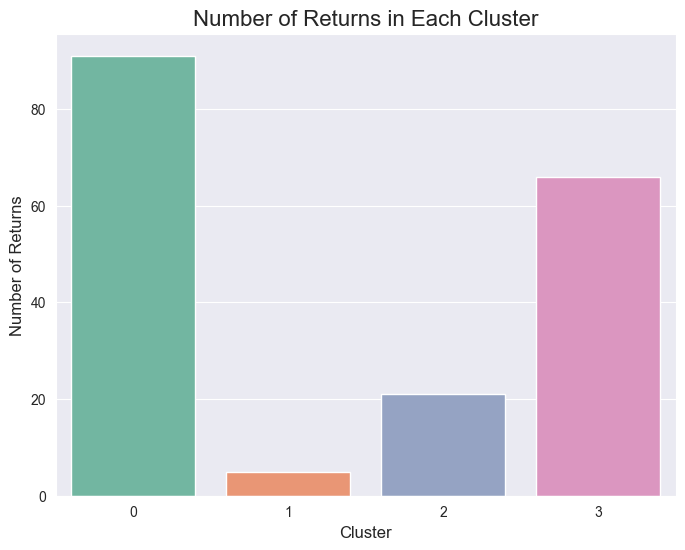

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

cluster_counts = df_clean['Cluster_Spectral'].value_counts().sort_index()

plt.figure(figsize=(8, 6))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='Set2')

plt.title('Number of Returns in Each Cluster', fontsize=16)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Number of Returns', fontsize=12)
plt.xticks(cluster_counts.index) 
plt.show()
